In [4]:
import numpy as np
from sklearn import metrics

from sklearn import datasets 
iris = datasets.load_iris() 
X = iris.data # 説明変数
Y = iris.target # 目的変数(教師ラベル)
X_train = X[ np.arange(0, len(X), 2) ] # 偶数行: 学習データ(説明変数) 
Y_train = Y[ np.arange(0, len(Y), 2) ] # 偶数行: 学習データ(目的変数: 教師ラベル) 
X_test = X[ np.arange(1, len(X), 2) ] # 奇数行: テストデータ(説明変数) 
Y_test = Y[ np.arange(1, len(Y), 2) ] # 奇数行: テストデータ(目的変数: 教師ラベル)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz # 可視化用
model = DecisionTreeClassifier( max_depth = 3 ) #決定木の深さ
model.fit( X_train, Y_train ) 
export_graphviz( model, out_file='tree.dot') # 可視化用
Y_predicted = model.predict( X_test )

In [7]:
# 混同行列 
metrics.confusion_matrix( Y_test, Y_predicted ) 

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  2, 23]], dtype=int64)

In [8]:
# 判別精度 (汎化精度) 
metrics.accuracy_score( Y_test, Y_predicted )

0.96

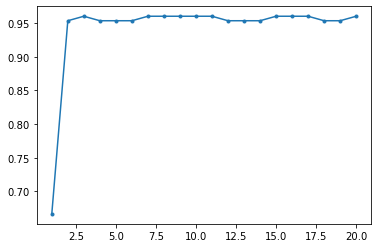

In [9]:
# 汎化精度を最大化する 
from sklearn.model_selection import cross_val_score 
MAX_DEPTH = 20 
accuracy = np.zeros( MAX_DEPTH ) 
for depth in range(1, MAX_DEPTH+1 ): 
 model = DecisionTreeClassifier( max_depth = depth ) 
 scores = cross_val_score( model, X, Y, cv=10 ) # CV法による汎化精度 (trainとtestの分割不要) 
 accuracy[depth-1] = np.mean( scores ) 
import matplotlib.pyplot as plt 
plt.plot( range(1, MAX_DEPTH+1), accuracy, '.-' )

In [10]:
from sklearn import datasets 
iris = datasets.load_iris() 
X = iris.data # 説明変数
Y = iris.target # 目的変数(教師ラベル

In [11]:
X_train = X[ np.arange(0, len(X), 2) ] # 偶数行: 学習データ(説明変数) 
Y_train = Y[ np.arange(0, len(Y), 2) ] # 偶数行: 学習データ(目的変数: 教師ラベル) 
X_test = X[ np.arange(1, len(X), 2) ] # 奇数行: テストデータ(説明変数) 
Y_test = Y[ np.arange(1, len(Y), 2) ] # 奇数行: テストデータ(目的変数: 教師ラベル)

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier( n_estimators=500, max_depth=10 ) 
# n_estimators:決定木の数 
model.fit( X_train, Y_train ) 
Y_predicted = model.predict( X_test ) # 使い方はいつもと同じ

In [14]:
from sklearn import metrics
metrics.confusion_matrix(Y_test, Y_predicted) # 混同行列


array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  2, 23]], dtype=int64)

In [15]:
metrics.accuracy_score(Y_test, Y_predicted)

0.96

In [16]:
from sklearn.ensemble import GradientBoostingClassifier 
model = GradientBoostingClassifier( n_estimators=500, max_depth=10 ) 
# n_estimators:決定木の数 
model.fit( X_train, Y_train ) 
Y_predicted = model.predict( X_test ) # 使い方はいつもと同じ 
metrics.confusion_matrix( Y_test, Y_predicted )

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  2, 23]], dtype=int64)

In [17]:
metrics.accuracy_score(Y_test, Y_predicted)

0.96

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
import warnings 
warnings.filterwarnings('ignore') # 警告非表示
model = MLPClassifier() # ニューラルネットを指定
Bag_model = BaggingClassifier( base_estimator = model, 
 n_estimators = 500, # 予測器の個数
 n_jobs=1, # 並列演算用のコア数
 random_state=1 ) # 乱数のシード 
Bag_model.fit( X_train, Y_train ) 
Y_predicted = Bag_model.predict( X_test ) # いつもと同じ使い方

In [19]:
metrics.confusion_matrix( Y_test, Y_predicted ) # 混同行列

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  2, 23]], dtype=int64)

In [20]:
metrics.accuracy_score( Y_test, Y_predicted ) 

0.96

In [22]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier( n_neighbors=5 ) # k近傍法を指定
Bag_model = BaggingClassifier( base_estimator = model, 
 n_estimators = 500, n_jobs=1, random_state=1 ) 
Bag_model.fit( X_train, Y_train ) 
Y_predicted = Bag_model.predict( X_test )

In [23]:
metrics.confusion_matrix( Y_test, Y_predicted )

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  0, 25]], dtype=int64)

In [24]:
metrics.accuracy_score( Y_test, Y_predicted ) 


0.9866666666666667

In [25]:
Y_predicted = Bag_model.predict( X_train ) 
metrics.accuracy_score( Y_train, Y_predicted )

0.9733333333333334